# HW5, Part 1: K-Means

## Question 1
Spectral relaxed k-means is k-means applied to a matrix $Y^*$ instead of directly to the matrix $X$. $Y^*$ is a $n \times k$ matrix where $n$ is the number of data points and $k$ is the number of clusters. The columns are the $k$ largest eigenvectors of $X^TX$ and each row represents a data point or row in the original matrix $X$. This seems remarkably similar to PCA.

I believe that it would be possible, but unlikely to get the same result running k-means and spectral k-means. It is generally unlikely to get exactly the same result in two separate k-means experiments.

In [1]:
# LIBRARIES
import copy
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Question 2 Observation Report
I decided to only work with 2D data in the experiments below since it's the easiest to graph the results. Spectral relaxed k-means didn't seem to work as well when I tested it with data that had clusters. It also gave somewhat random seeming results when the number of clusters was greater than the number of parameters. That second part is likely because a 2D X would not have had 3 non-zero singular values (cooresponding to 3 clusters and eigenvectors).

(code included below)

## Question 2 part 1
Here is the code for implementing basic k-means and a small trial run to make sure it works

In [2]:
# Kmeans
#  implementing standard kmeans
def kMeans(data,k):
    n = data.shape[0] # number of data points
    # C = np.random.randint(100,size=(k,data.shape[1])) # select random initial centroids
    C = getInitialCenters(data,k)
    M,mv,loss = getMemberships(data,C)
    mv_old = np.ones(n)*(k+1) # initially set old memberships to something new mv couldnt be
    
    i=0
    while (not np.all(mv_old == mv)):
        print('('+str(i)+') loss: '+str(np.sum(loss)))
        i+=1
        mv_old = copy.deepcopy(mv)
        C = getCenters(data,M)
        M,mv,loss = getMemberships(data,C)
    print('End Loss: '+str(np.sum(loss)))
    return(M,loss)
    
def getMemberships(data,centers):
    n = data.shape[0] # number of data points
    p = data.shape[1] # number of features
    k = centers.shape[0] # number of clusters
    distances = np.empty((n,k))
    for j in range(k):
        c_j=np.outer(centers[j,:],np.ones(n)).T
        dist_j = data-c_j
        distances[:,j] = np.sum(np.abs(dist_j)**2,axis=1)
    membership_vector = np.argmin(distances,axis=1)
    M = np.zeros((n,k))
    losses = np.zeros(k)
    for i in range(n):
        M[i,membership_vector[i]]=1
        losses[membership_vector[i]] += distances[i,membership_vector[i]]
    # print(membership_vector)
    return(M,membership_vector,losses)

def getInitialCenters(data,k):
    # C = np.random.randint(100,size=(k,data.shape[1])) # select random initial centroids
    p = data.shape[1] 
    C = np.empty((k,p))
    
    for i in range(p):
        # print(p)
        p_min = np.min(data[:,i])
        p_max = np.max(data[:,i])
        r = np.random.uniform(low=p_min,high=p_max,size=(k))
        C[:,i]=r
    return(C)
    

def getCenters(data,memberships):
    n = data.shape[0] # number of data points
    p = data.shape[1] # number of features
    k = memberships.shape[1] # number of clusters
    
    centers = np.empty((k,p))
    for j in range(k):
        mask = memberships[:,j]==1
        x_j = data[mask,:]
        n_j = x_j.shape[0]
        e = np.ones(n_j)
        if n_j > 0: # dont change center if cluster is empty
            # print('x_j:')
            # print(x_j)
            centers[j,:] = np.matmul(x_j.T,e)/n_j
            # print(centers[j,:])
    return(centers)
        

In [3]:
# Set some initial parameters
n = 100 # number of datapoints
p = 5 # number of features in dataset
k = 3 # number of clusters

# create a random dataset 
X = np.random.randint(n,size=(100,p))
M,loss = kMeans(X,k)

(0) loss: 479360.41601120564
(1) loss: 303416.38318400166
(2) loss: 296106.2014373078
(3) loss: 292534.23920421576
(4) loss: 289894.77434589027
End Loss: 288386.4194616977


## Question 2 Part 2
Here is the code for implementing spectral relaxed k-means

In [4]:
# Spectral Relaxed K-Means
def spectralRelaxedKMeans(data,k):
    Y_star = getYstar(data,k)
    M,loss = kMeans(Y_star,k)
    return(M,loss)

def getYstar(X,k):
    m = np.matmul(X,X.T)
    eigVals, Y_star = np.linalg.eig(m)
    Y_star = Y_star[:,:k] # get the first k eigenvectors
    return(Y_star)
    
    

In [5]:
# Set some initial parameters
n = 100 # number of datapoints
p = 2 # number of features in dataset
k = 2 # number of clusters

# create a random dataset 
X = np.random.randint(n,size=(100,p))
M,loss = kMeans(X,k)

sr_M,sr_loss = spectralRelaxedKMeans(X,k)

(0) loss: 151973.27425460727
(1) loss: 112825.74446716014
(2) loss: 112085.94604632177
End Loss: 111980.9420289855
(0) loss: 0.7174123903485368
End Loss: 0.4626838267085389


/var/folders/1f/r7ysvjds2vl7pyf4gfsp958c0000gn/T/ipykernel_6757/2107827520.py:47: ComplexWarning: Casting complex values to real discards the imaginary part
  r = np.random.uniform(low=p_min,high=p_max,size=(k))
/var/folders/1f/r7ysvjds2vl7pyf4gfsp958c0000gn/T/ipykernel_6757/2107827520.py:66: ComplexWarning: Casting complex values to real discards the imaginary part
  centers[j,:] = np.matmul(x_j.T,e)/n_j


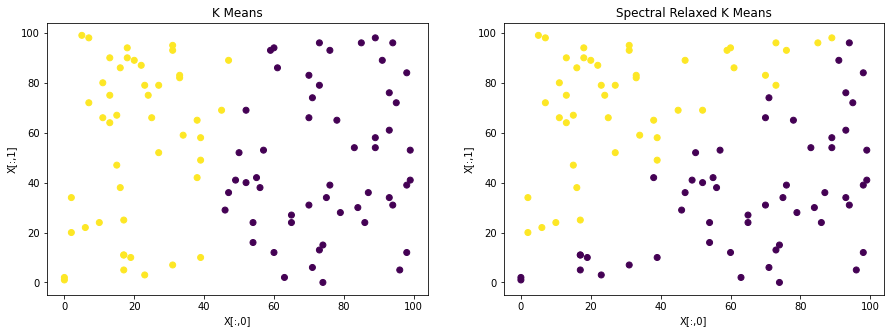

In [6]:
pltDF = pd.DataFrame(X,columns=['x0','x1'])
pltDF['clust'] = np.argmax(M,axis=1)
pltDF['clust_sr'] = np.argmax(sr_M,axis=1)
pltDF.head()
# plt.plot(X[:,0], X[:,1], 'o', color='black');

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(pltDF.x0.to_numpy(), pltDF.x1,c=pltDF.clust)
plt.title("K Means")
plt.xlabel('X[:,0]')
plt.ylabel('X[:,1]')

plt.subplot(1, 2, 2) # index 2
plt.scatter(pltDF.x0.to_numpy(), pltDF.x1,c=pltDF.clust_sr)
plt.title("Spectral Relaxed K Means")
plt.xlabel('X[:,0]')
plt.ylabel('X[:,1]')

plt.show()

In [7]:
# GENERATE SOME DATA WTH CLUSTERS
# Set some initial parameters
n = 500 # number of datapoints
p = 2 # number of features in dataset
k = 2 # number of clusters

# create a random dataset 
# X = np.random.randint(n,size=(100,p))
X=np.empty((0,2))

while X.shape[0]<n:
    this_n = np.random.randint(n/2)
    mean_0 = np.random.randint(50)
    std_0 = np.random.randint(5)
    this_0 = np.random.normal(mean_0,std_0,size=(this_n,1))
    mean_1 = np.random.randint(50)
    std_1 = np.random.randint(5)
    this_1 = np.random.normal(mean_1,std_1,size=(this_n,1))
    
    this_X = np.append(this_1,this_0,axis=1)
    X = np.append(X,this_X,axis=0)
    # print(X.shape)
    
X = X[:n,:]

M,loss = kMeans(X,k)

sr_M,sr_loss = spectralRelaxedKMeans(X,k)

(0) loss: 83788.68208178946
End Loss: 8619.998783224035
(0) loss: 0.9608565449588575
(1) loss: 0.3775795471952728
(2) loss: 0.3194344579003324
(3) loss: 0.3140335562446889
(4) loss: 0.31291774468681943
(5) loss: 0.3121774312391026
(6) loss: 0.31114757046659114
(7) loss: 0.3109530352540506
End Loss: 0.3108345360460045


/var/folders/1f/r7ysvjds2vl7pyf4gfsp958c0000gn/T/ipykernel_6757/2107827520.py:47: ComplexWarning: Casting complex values to real discards the imaginary part
  r = np.random.uniform(low=p_min,high=p_max,size=(k))
/var/folders/1f/r7ysvjds2vl7pyf4gfsp958c0000gn/T/ipykernel_6757/2107827520.py:66: ComplexWarning: Casting complex values to real discards the imaginary part
  centers[j,:] = np.matmul(x_j.T,e)/n_j


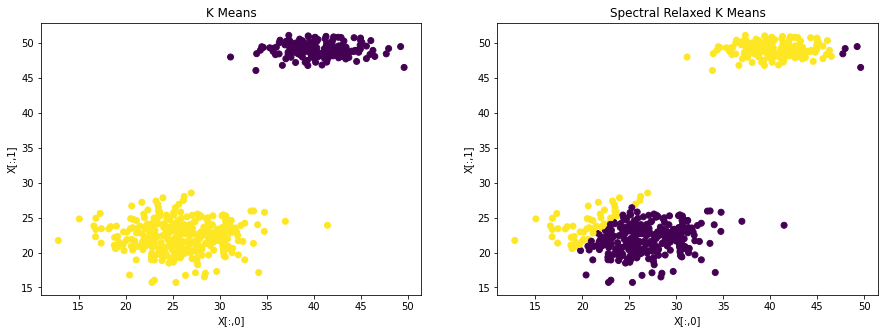

In [8]:
pltDF = pd.DataFrame(X,columns=['x0','x1'])
pltDF['clust'] = np.argmax(M,axis=1)
pltDF['clust_sr'] = np.argmax(sr_M,axis=1)
pltDF.head()
# plt.plot(X[:,0], X[:,1], 'o', color='black');

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(pltDF.x0.to_numpy(), pltDF.x1,c=pltDF.clust)
plt.title("K Means")
plt.xlabel('X[:,0]')
plt.ylabel('X[:,1]')

plt.subplot(1, 2, 2) # index 2
plt.scatter(pltDF.x0.to_numpy(), pltDF.x1,c=pltDF.clust_sr)
plt.title("Spectral Relaxed K Means")
plt.xlabel('X[:,0]')
plt.ylabel('X[:,1]')

plt.show()

In [9]:
# Set some initial parameters
n = 100 # number of datapoints
p = 2 # number of features in dataset
k = 3 # number of clusters

# create a random dataset 
X = np.random.randint(n,size=(100,p))
M,loss = kMeans(X,k)

sr_M,sr_loss = spectralRelaxedKMeans(X,k)

(0) loss: 81539.04959369713
(1) loss: 62522.90011627907
End Loss: 62464.38848837209
(0) loss: 1.5699556197608235
(1) loss: 1.193711429944407
(2) loss: 1.1666193275139363
(3) loss: 1.157372956654712
(4) loss: 1.1357146579658313
(5) loss: 1.123174120926509
(6) loss: 1.1123984231527058
(7) loss: 1.103867208660182
(8) loss: 1.0884020942534256
(9) loss: 1.0821614817733185
(10) loss: 1.0700968796248587
(11) loss: 1.0568678882073286
(12) loss: 1.0563579858637189
End Loss: 1.055383264880236


/var/folders/1f/r7ysvjds2vl7pyf4gfsp958c0000gn/T/ipykernel_6757/2107827520.py:47: ComplexWarning: Casting complex values to real discards the imaginary part
  r = np.random.uniform(low=p_min,high=p_max,size=(k))
/var/folders/1f/r7ysvjds2vl7pyf4gfsp958c0000gn/T/ipykernel_6757/2107827520.py:66: ComplexWarning: Casting complex values to real discards the imaginary part
  centers[j,:] = np.matmul(x_j.T,e)/n_j


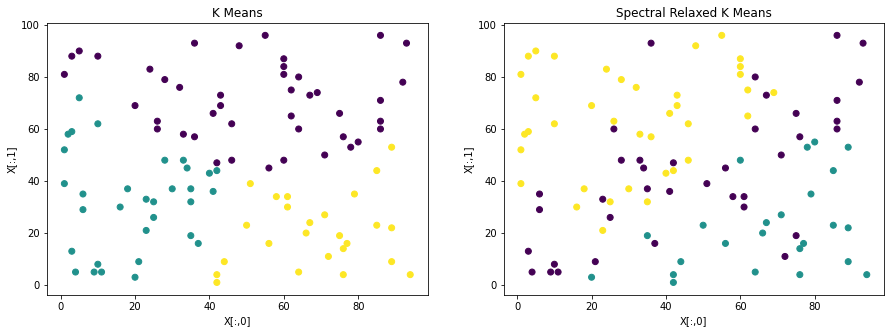

In [10]:
pltDF = pd.DataFrame(X,columns=['x0','x1'])
pltDF['clust'] = np.argmax(M,axis=1)
pltDF['clust_sr'] = np.argmax(sr_M,axis=1)
pltDF.head()
# plt.plot(X[:,0], X[:,1], 'o', color='black');

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(pltDF.x0.to_numpy(), pltDF.x1,c=pltDF.clust)
plt.title("K Means")
plt.xlabel('X[:,0]')
plt.ylabel('X[:,1]')

plt.subplot(1, 2, 2) # index 2
plt.scatter(pltDF.x0.to_numpy(), pltDF.x1,c=pltDF.clust_sr)
plt.title("Spectral Relaxed K Means")
plt.xlabel('X[:,0]')
plt.ylabel('X[:,1]')

plt.show()